In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
#Load and split the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() 
#Normalize pixle values to be between 0 and 1

train_images , test_images = train_images/255.0, test_images /255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 773s 5us/step


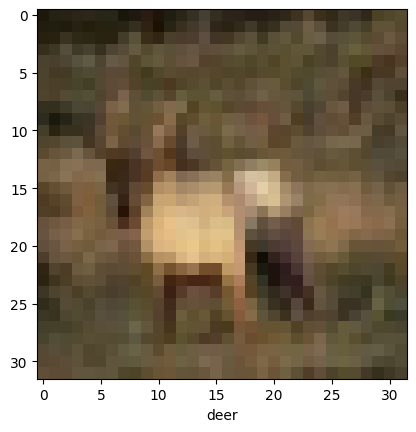

In [3]:
img_index = 3

plt.imshow(train_images[img_index], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[img_index][0]])
plt.show()

# CNN Architecture

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# Training

In [8]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                   validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 69s 43ms/step - loss: 1.5180 - accuracy: 0.4471 - val_loss: 1.2876 - val_accuracy: 0.5346
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1610 - accuracy: 0.5883 - val_loss: 1.1159 - val_accuracy: 0.6064
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0211 - accuracy: 0.6394 - val_loss: 1.0124 - val_accuracy: 0.6443
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9239 - accuracy: 0.6747 - val_loss: 1.0116 - val_accuracy: 0.6516
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8549 - accuracy: 0.6976 - val_loss: 0.9031 - val_accuracy: 0.6848
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7967 - accuracy: 0.7200 - val_loss: 0.8806 - val_accuracy: 0.6958
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7513 - accuracy: 0.7365 - val_loss: 0.8659 -

# Evaluating The Model

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.9154 - accuracy: 0.6991 - 4s/epoch - 12ms/step
0.6991000175476074


# Data Augmentation

<function matplotlib.pyplot.show(close=None, block=None)>

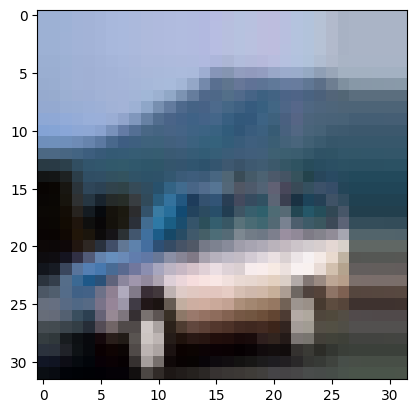

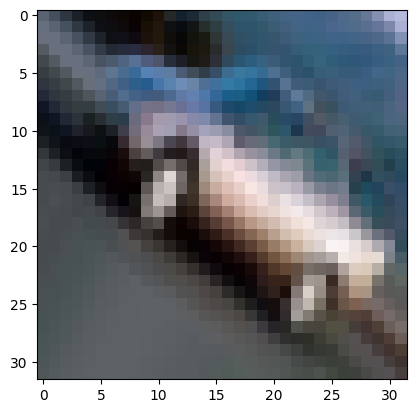

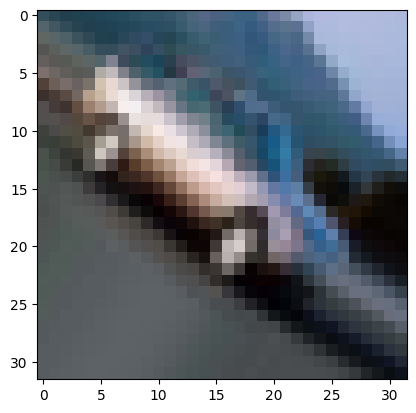

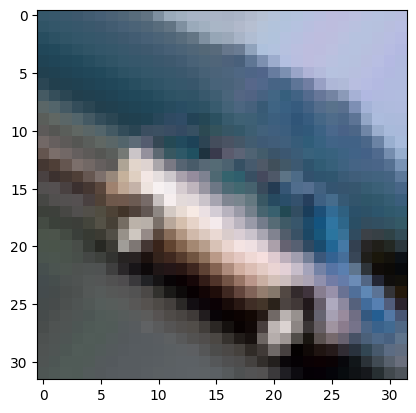

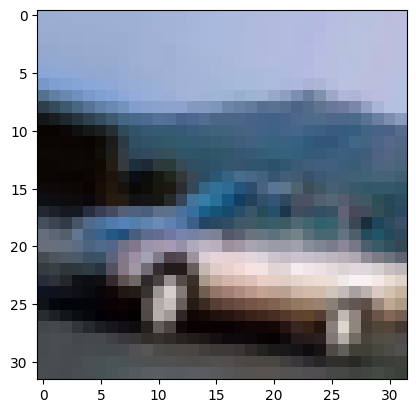

In [13]:
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator

#creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range =40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#pick image to transform
test_img = train_images[4]
img = img_to_array(test_img) #Convert image to numpy array
img = img.reshape((1,)+img.shape) #reshape image

i = 0
#This loop runs forever until we break, saving images to the current directory
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(img_to_array(batch[0]))
    i += 1
    if i > 4:
        break
        
plt.show

